In [1]:
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("spotify.csv")

In [3]:
data

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [5]:
# 1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
#the needful.

print("Checking for null values:")
null_values = data.isnull().sum()  # Count the null values in each column
print(null_values)

data_cleaned = data.dropna()  # Drop rows with any null values


# Step 3: Check for duplicate rows
print("\nChecking for duplicate rows:")
duplicate_rows = data.duplicated().sum()  # Count the duplicate rows
print(f"Number of duplicate rows: {duplicate_rows}")

data_cleaned = data_cleaned.drop_duplicates()  # Remove duplicate rows

# Optionally, print the cleaned data
print("\nCleaned Data (First 5 rows):")
print(data_cleaned.head())


Checking for null values:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Checking for duplicate rows:
Number of duplicate rows: 27

Cleaned Data (First 5 rows):
  Artist                               Track Name  Popularity  Duration (ms)  \
0  Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92         319191   
1  Drake                                One Dance          91         173986   
2  Drake                       IDGAF (feat. Yeat)          90         260111   
3  Drake     First Person Shooter (feat. J. Cole)          88         247444   
4  Drake            Jimmy Cooks (feat. 21 Savage)          88         218364   

                 Track ID  
0  1yeB8MUNeLo9Ek1UEpsyz6  
1  1zi7xx7UVEFkmKfv06H8x0  
2  2YSzYUF3jWqb9YP9VXmpjE  
3  7aqfrAY2p9BUSiupwk3svU  
4  3F5CgOj3wFlRv51JsHbxhe  


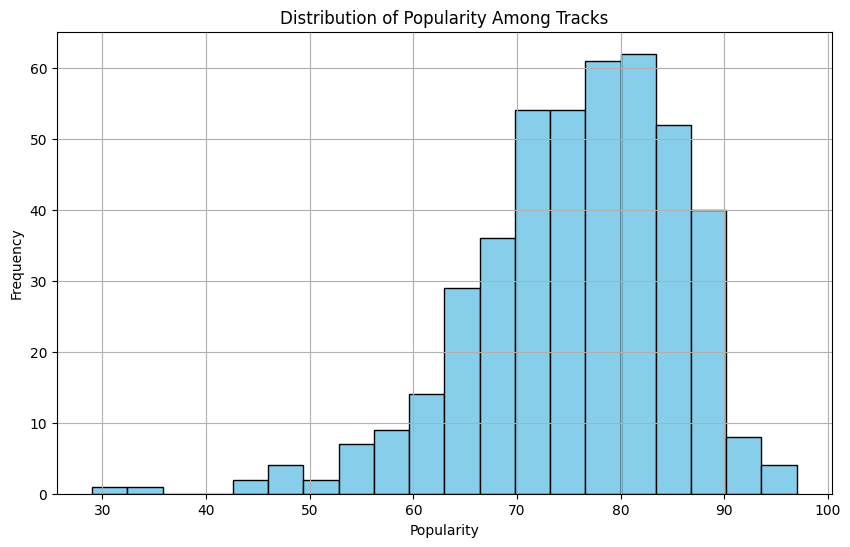

In [6]:
#2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?
data['popularity'] = pd.to_numeric(data['Popularity'], errors='coerce')

    # Step 3: Visualize the distribution using a histogram
plt.figure(figsize=(10, 6))
plt.hist(data['popularity'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Popularity Among Tracks')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

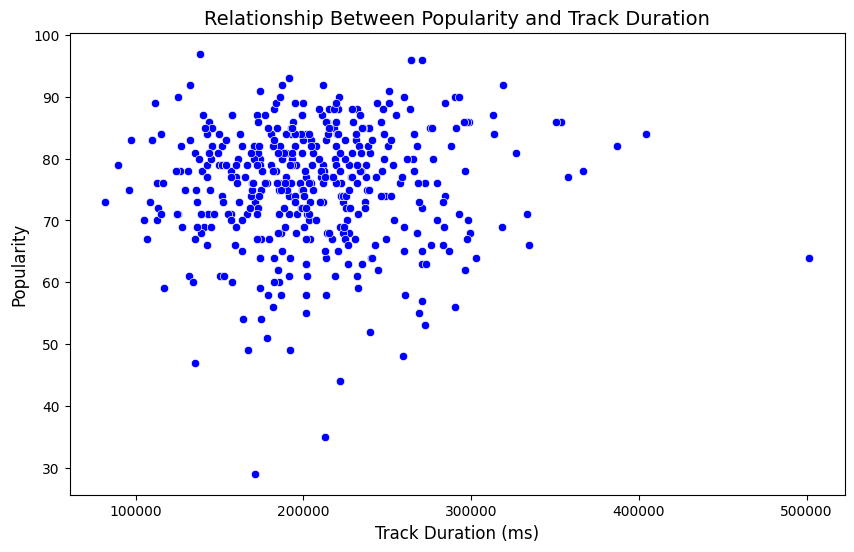

In [8]:
#3.  Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Duration (ms)', y='Popularity', color='b')

# Add labels and title
plt.xlabel("Track Duration (ms)", fontsize=12)
plt.ylabel("Popularity", fontsize=12)
plt.title("Relationship Between Popularity and Track Duration", fontsize=14)

# Show the plot
plt.show()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
 5   popularity     440 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 20.8+ KB


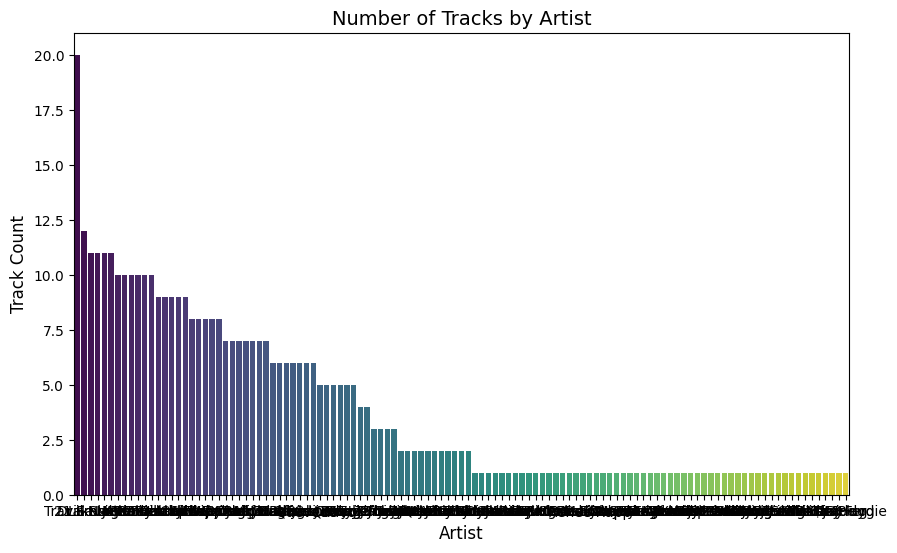

In [10]:
#4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
#a countplot

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Artist', order=data['Artist'].value_counts().index, palette='viridis')

# Add labels and title
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Track Count', fontsize=12)
plt.title('Number of Tracks by Artist', fontsize=14)

# Show the plot
plt.show()

In [11]:
#5.  What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each?

least_popular_tracks = data.sort_values(by='Popularity', ascending=True).head(5)

# Display the result (artist and track name for each least popular track)
print(least_popular_tracks[['Artist', 'Track Name', 'Popularity']])



             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
435  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47


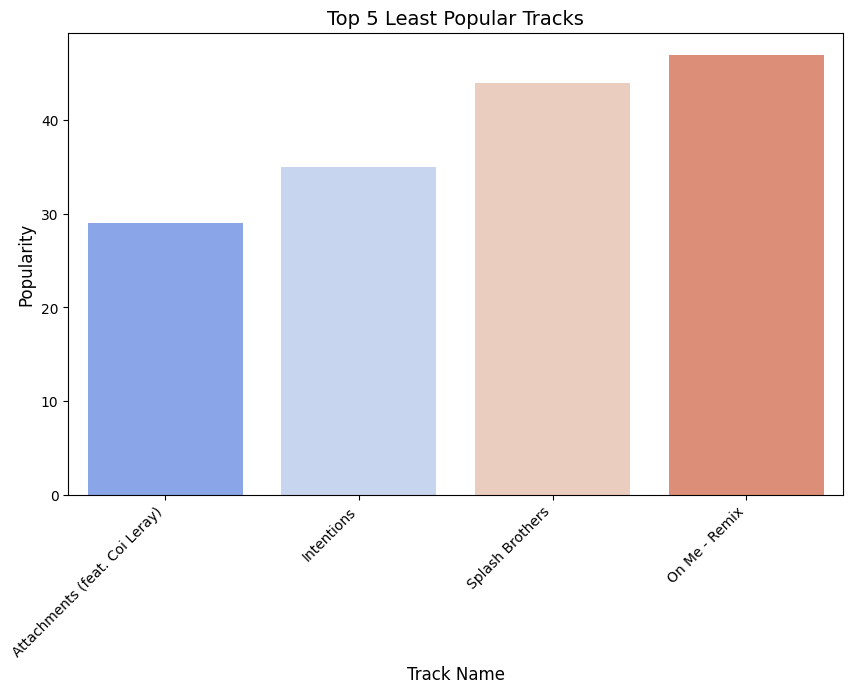

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(data=least_popular_tracks, x='Track Name', y='Popularity', palette='coolwarm')

# Add labels and title
plt.xlabel('Track Name', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.title('Top 5 Least Popular Tracks', fontsize=14)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [13]:
#Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
#display the average popularity for each artist.
average_popularity_by_artist = data.groupby('Artist')['Popularity'].mean().reset_index()

# 2. Sort the artists by average popularity and get the top 5
top_5_artists = average_popularity_by_artist.sort_values(by='Popularity', ascending=False).head(5)

# 3. Display the average popularity for each of the top 5 artists
print(top_5_artists)

           Artist  Popularity
113         cassö   92.000000
104        Trueno   89.000000
24   David Guetta   87.000000
103  Travis Scott   87.000000
114            ¥$   86.090909


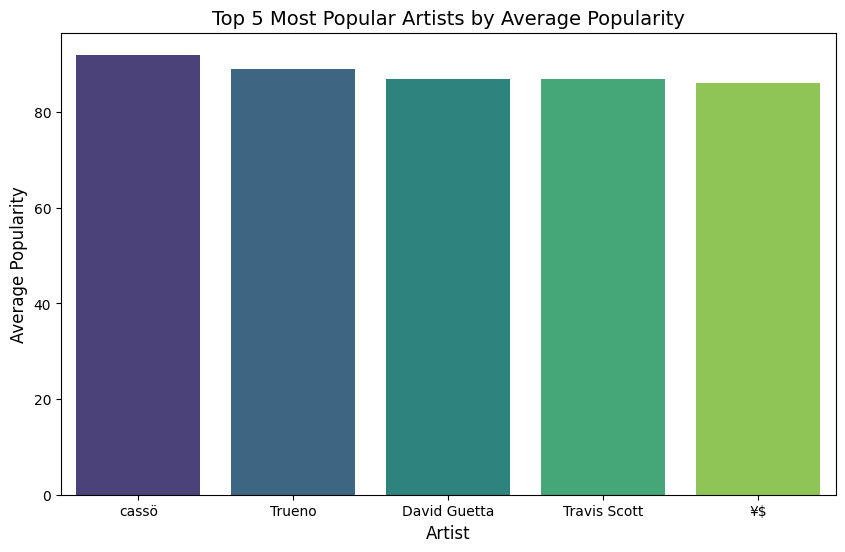

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_artists, x='Artist', y='Popularity', palette='viridis')

# Add labels and title
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Average Popularity', fontsize=12)
plt.title('Top 5 Most Popular Artists by Average Popularity', fontsize=14)

# Show the plot
plt.show()

In [15]:
#7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

average_popularity_by_artist = data.groupby('Artist')['Popularity'].mean().reset_index()

# Step 2: Get the top 5 artists based on average popularity
top_5_artists = average_popularity_by_artist.sort_values(by='Popularity', ascending=False).head(5)

# Step 3: For each top artist, find their most popular track
most_popular_tracks = []

for artist in top_5_artists['Artist']:
    # Filter the data for the current artist and get the track with the highest popularity
    artist_tracks = data[data['Artist'] == artist]
    most_popular_track = artist_tracks.loc[artist_tracks['Popularity'].idxmax()]
    most_popular_tracks.append({
        'Artist': artist,
        'most_popular_track': most_popular_track['Track Name'],
        'Popularity': most_popular_track['Popularity']
    })

# Convert the list to a DataFrame for better display
most_popular_tracks_df = pd.DataFrame(most_popular_tracks)

# Display the most popular tracks for the top 5 artists
print(most_popular_tracks_df)


         Artist            most_popular_track  Popularity
0         cassö                         Prada          92
1        Trueno  Mamichula - con Nicki Nicole          89
2  David Guetta            Baby Don't Hurt Me          87
3  Travis Scott    FE!N (feat. Playboi Carti)          93
4            ¥$                      CARNIVAL          96


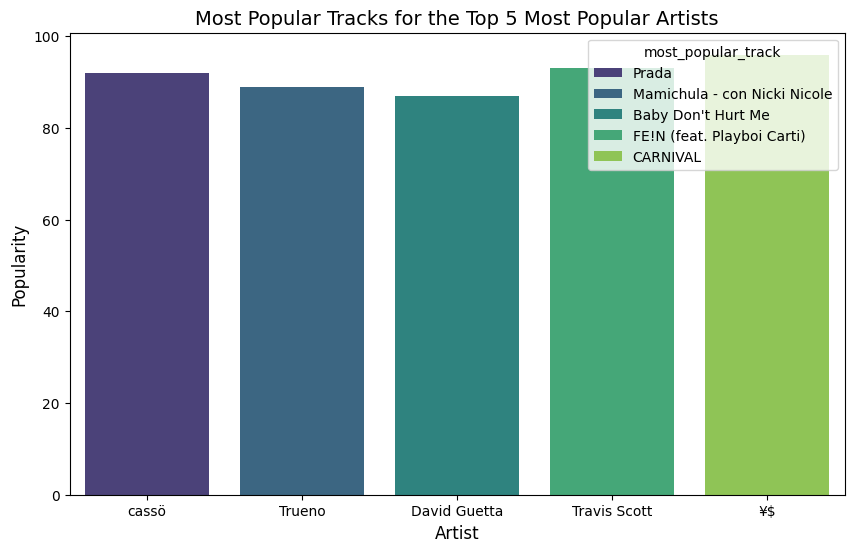

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(data=most_popular_tracks_df, x='Artist', y='Popularity', hue='most_popular_track', palette='viridis')

# Add labels and title
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.title('Most Popular Tracks for the Top 5 Most Popular Artists', fontsize=14)

# Show the plot
plt.show()

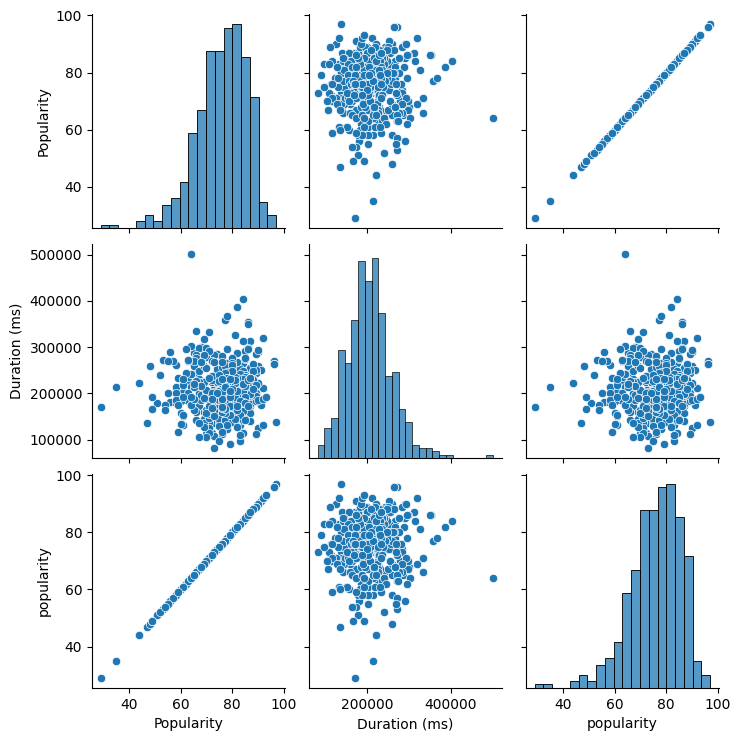

In [17]:
#8.  Visualize relationships between multiple numerical variables simultaneously using a pair plot.
sns.pairplot(data)

# Display the plot
plt.show()



In [19]:
data.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID',
       'popularity'],
      dtype='object')

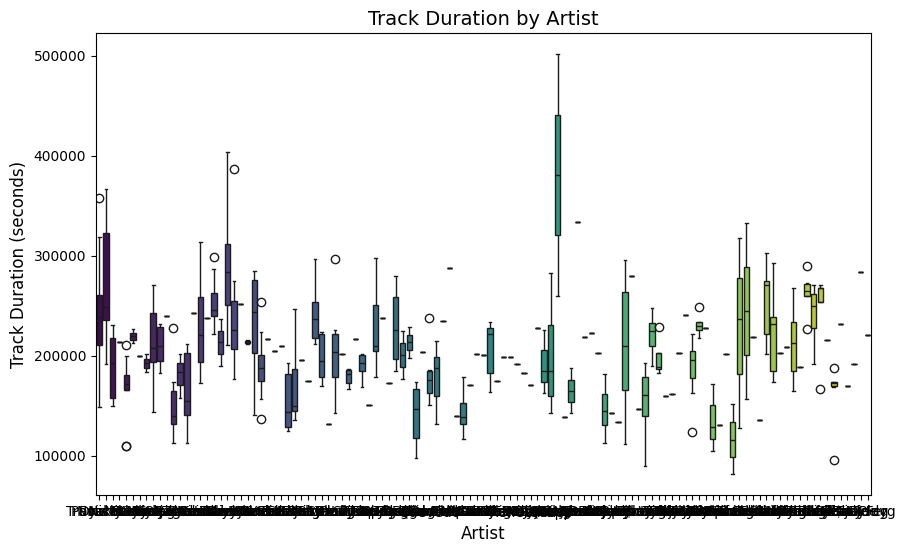

In [20]:
# 9 Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
#violin plot.

plt.figure(figsize=(10, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=data, palette='viridis')

# Add labels and title
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Track Duration (seconds)', fontsize=12)
plt.title('Track Duration by Artist', fontsize=14)

# Show the plot
plt.show()



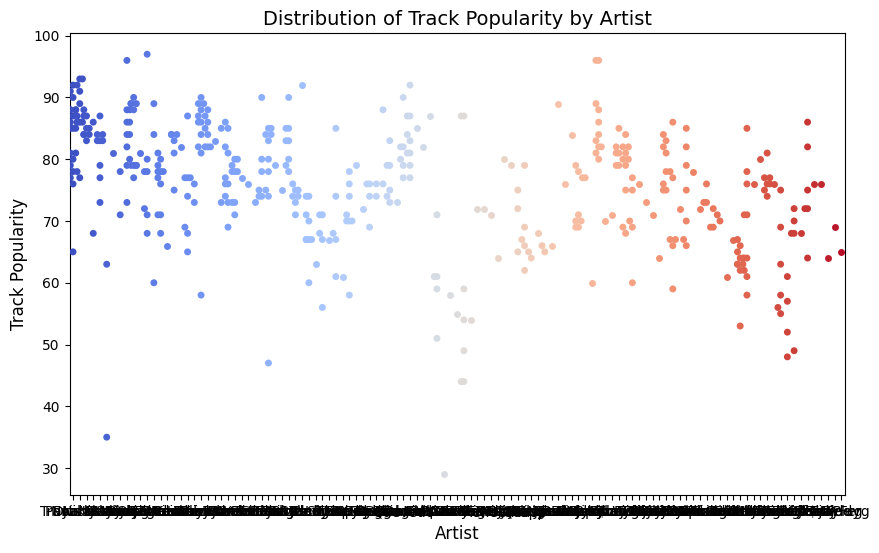

In [21]:
#.10 How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
#violin plot.

plt.figure(figsize=(10, 6))
sns.swarmplot(x='Artist', y='Popularity', data=data, palette='coolwarm')

# Add labels and title
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Track Popularity', fontsize=12)
plt.title('Distribution of Track Popularity by Artist', fontsize=14)

# Show the plot
plt.show()

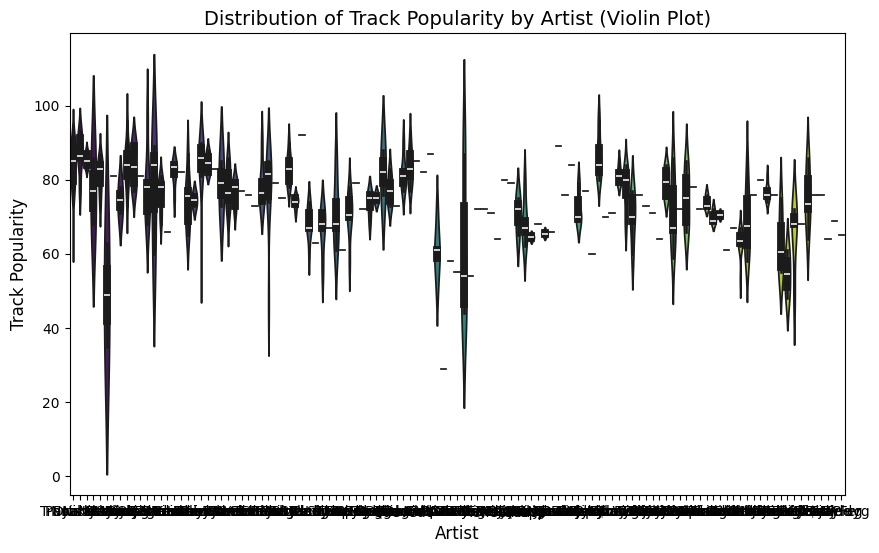

In [22]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Artist', y='Popularity', data=data, palette='viridis')

# Add labels and title
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Track Popularity', fontsize=12)
plt.title('Distribution of Track Popularity by Artist (Violin Plot)', fontsize=14)

# Show the plot
plt.show()
